In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk



In [60]:
from wordcloud import WordCloud

In [63]:
with open('Table Tennis.txt','r',encoding="utf8") as f:
    text=f.readlines()

In [64]:
text=[line.strip() for line in text]

In [65]:
text

['TABLE TENNIS',
 '',
 'INTRODUCTION',
 'Table tennis, or ping-pong, is an enjoyable sport but it can be highly competitive. Each',
 'player tries to outscore his opponent through the use of skill, strength, speed, stamina',
 'and strategy. The game is somewhat similar to tennis, where players hit the ball back and',
 'forth over a net.',
 'HISTORY',
 'The origin of table tennis has never been exactly pinpointed, even though it’s a relatively',
 'young sport. The sport is younger than lawn tennis and not much older than basketball.',
 '',
 'Physical Education Learning Packets   #30 Table Tennis',
 'The Advantage Press, Inc.',
 'The earliest known form of the sport, called indoor tennis, was played in the early 1880s',
 'by British army officers in India and South Africa. They played the game by using lids',
 'from cigar boxes as paddles and rounded corks from wine bottles as balls. They set up a',
 'row of books across the middle of a table to establish the net.',
 '',
 'James Gibb, an

In [66]:
chunk_2=[line.strip() for line in text]

In [67]:
chunk_2

['TABLE TENNIS',
 '',
 'INTRODUCTION',
 'Table tennis, or ping-pong, is an enjoyable sport but it can be highly competitive. Each',
 'player tries to outscore his opponent through the use of skill, strength, speed, stamina',
 'and strategy. The game is somewhat similar to tennis, where players hit the ball back and',
 'forth over a net.',
 'HISTORY',
 'The origin of table tennis has never been exactly pinpointed, even though it’s a relatively',
 'young sport. The sport is younger than lawn tennis and not much older than basketball.',
 '',
 'Physical Education Learning Packets   #30 Table Tennis',
 'The Advantage Press, Inc.',
 'The earliest known form of the sport, called indoor tennis, was played in the early 1880s',
 'by British army officers in India and South Africa. They played the game by using lids',
 'from cigar boxes as paddles and rounded corks from wine bottles as balls. They set up a',
 'row of books across the middle of a table to establish the net.',
 '',
 'James Gibb, an

In [68]:
chunk_pasted_2=' '.join(chunk_2)

In [69]:
chunk_pasted_2

'TABLE TENNIS  INTRODUCTION Table tennis, or ping-pong, is an enjoyable sport but it can be highly competitive. Each player tries to outscore his opponent through the use of skill, strength, speed, stamina and strategy. The game is somewhat similar to tennis, where players hit the ball back and forth over a net. HISTORY The origin of table tennis has never been exactly pinpointed, even though it’s a relatively young sport. The sport is younger than lawn tennis and not much older than basketball.  Physical Education Learning Packets   #30 Table Tennis The Advantage Press, Inc. The earliest known form of the sport, called indoor tennis, was played in the early 1880s by British army officers in India and South Africa. They played the game by using lids from cigar boxes as paddles and rounded corks from wine bottles as balls. They set up a row of books across the middle of a table to establish the net.  James Gibb, an Englishman who visited the United States in 1900, brought some hollow ce

In [70]:
clean_data1=chunk_pasted_2.lower()
clean_data1

'table tennis  introduction table tennis, or ping-pong, is an enjoyable sport but it can be highly competitive. each player tries to outscore his opponent through the use of skill, strength, speed, stamina and strategy. the game is somewhat similar to tennis, where players hit the ball back and forth over a net. history the origin of table tennis has never been exactly pinpointed, even though it’s a relatively young sport. the sport is younger than lawn tennis and not much older than basketball.  physical education learning packets   #30 table tennis the advantage press, inc. the earliest known form of the sport, called indoor tennis, was played in the early 1880s by british army officers in india and south africa. they played the game by using lids from cigar boxes as paddles and rounded corks from wine bottles as balls. they set up a row of books across the middle of a table to establish the net.  james gibb, an englishman who visited the united states in 1900, brought some hollow ce

In [71]:
clean_data2=re.sub(r'[^\w\s]','',clean_data1)

In [72]:
clean_data2

'table tennis  introduction table tennis or pingpong is an enjoyable sport but it can be highly competitive each player tries to outscore his opponent through the use of skill strength speed stamina and strategy the game is somewhat similar to tennis where players hit the ball back and forth over a net history the origin of table tennis has never been exactly pinpointed even though its a relatively young sport the sport is younger than lawn tennis and not much older than basketball  physical education learning packets   30 table tennis the advantage press inc the earliest known form of the sport called indoor tennis was played in the early 1880s by british army officers in india and south africa they played the game by using lids from cigar boxes as paddles and rounded corks from wine bottles as balls they set up a row of books across the middle of a table to establish the net  james gibb an englishman who visited the united states in 1900 brought some hollow celluloid balls home and b

In [73]:
clean_data3=re.sub(r'\d+',' ',clean_data2)

In [74]:
clean_data3

'table tennis  introduction table tennis or pingpong is an enjoyable sport but it can be highly competitive each player tries to outscore his opponent through the use of skill strength speed stamina and strategy the game is somewhat similar to tennis where players hit the ball back and forth over a net history the origin of table tennis has never been exactly pinpointed even though its a relatively young sport the sport is younger than lawn tennis and not much older than basketball  physical education learning packets     table tennis the advantage press inc the earliest known form of the sport called indoor tennis was played in the early  s by british army officers in india and south africa they played the game by using lids from cigar boxes as paddles and rounded corks from wine bottles as balls they set up a row of books across the middle of a table to establish the net  james gibb an englishman who visited the united states in   brought some hollow celluloid balls home and began pl

In [75]:
stop_words=set(stopwords.words('english'))

In [76]:
 >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [82]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
tokens=word_tokenize(clean_data3)

In [84]:
clean_data4=[i for i in tokens if not i in stop_words]
clean_data4

['table',
 'tennis',
 'introduction',
 'table',
 'tennis',
 'pingpong',
 'enjoyable',
 'sport',
 'highly',
 'competitive',
 'player',
 'tries',
 'outscore',
 'opponent',
 'use',
 'skill',
 'strength',
 'speed',
 'stamina',
 'strategy',
 'game',
 'somewhat',
 'similar',
 'tennis',
 'players',
 'hit',
 'ball',
 'back',
 'forth',
 'net',
 'history',
 'origin',
 'table',
 'tennis',
 'never',
 'exactly',
 'pinpointed',
 'even',
 'though',
 'relatively',
 'young',
 'sport',
 'sport',
 'younger',
 'lawn',
 'tennis',
 'much',
 'older',
 'basketball',
 'physical',
 'education',
 'learning',
 'packets',
 'table',
 'tennis',
 'advantage',
 'press',
 'inc',
 'earliest',
 'known',
 'form',
 'sport',
 'called',
 'indoor',
 'tennis',
 'played',
 'early',
 'british',
 'army',
 'officers',
 'india',
 'south',
 'africa',
 'played',
 'game',
 'using',
 'lids',
 'cigar',
 'boxes',
 'paddles',
 'rounded',
 'corks',
 'wine',
 'bottles',
 'balls',
 'set',
 'row',
 'books',
 'across',
 'middle',
 'table',
 'e

In [85]:
clean_data4=" ".join(str(x) for x in clean_data4)

In [86]:
clean_data4

'table tennis introduction table tennis pingpong enjoyable sport highly competitive player tries outscore opponent use skill strength speed stamina strategy game somewhat similar tennis players hit ball back forth net history origin table tennis never exactly pinpointed even though relatively young sport sport younger lawn tennis much older basketball physical education learning packets table tennis advantage press inc earliest known form sport called indoor tennis played early british army officers india south africa played game using lids cigar boxes paddles rounded corks wine bottles balls set row books across middle table establish net james gibb englishman visited united states brought hollow celluloid balls home began playing indoor tennis friends using new balls gibb apparently came name ping pong representing sounds ball hitting paddle table central european dominance continued time world war ii asian players took sport beginning one factor sudden emergence asian stars introduc

In [87]:
clean_data5=' '.join(i for i in clean_data4.split() if not (i.isalpha()and len(i)==1))

In [88]:
clean_data5

'table tennis introduction table tennis pingpong enjoyable sport highly competitive player tries outscore opponent use skill strength speed stamina strategy game somewhat similar tennis players hit ball back forth net history origin table tennis never exactly pinpointed even though relatively young sport sport younger lawn tennis much older basketball physical education learning packets table tennis advantage press inc earliest known form sport called indoor tennis played early british army officers india south africa played game using lids cigar boxes paddles rounded corks wine bottles balls set row books across middle table establish net james gibb englishman visited united states brought hollow celluloid balls home began playing indoor tennis friends using new balls gibb apparently came name ping pong representing sounds ball hitting paddle table central european dominance continued time world war ii asian players took sport beginning one factor sudden emergence asian stars introduc

In [89]:
clean_data6=clean_data5.strip()

In [90]:
clean_data6

'table tennis introduction table tennis pingpong enjoyable sport highly competitive player tries outscore opponent use skill strength speed stamina strategy game somewhat similar tennis players hit ball back forth net history origin table tennis never exactly pinpointed even though relatively young sport sport younger lawn tennis much older basketball physical education learning packets table tennis advantage press inc earliest known form sport called indoor tennis played early british army officers india south africa played game using lids cigar boxes paddles rounded corks wine bottles balls set row books across middle table establish net james gibb englishman visited united states brought hollow celluloid balls home began playing indoor tennis friends using new balls gibb apparently came name ping pong representing sounds ball hitting paddle table central european dominance continued time world war ii asian players took sport beginning one factor sudden emergence asian stars introduc

In [91]:
words_dict={}

In [92]:
for word in  clean_data6.split():
    words_dict[word]=words_dict.get(word,0)+1
for key in sorted(words_dict):
    print("{}:{}".format(key,words_dict[key]))

able:1
across:2
advantage:2
africa:1
ahead:2
allowed:1
also:1
american:1
another:1
appa:2
apparently:1
army:1
around:1
asian:2
association:2
associations:1
back:2
ball:21
ballresulting:1
balls:4
basketball:1
became:1
began:1
beginning:1
books:1
bottles:1
bouncing:1
boxes:1
british:1
brothers:1
brought:1
called:1
came:1
celluloid:1
central:1
championship:2
championships:1
cigar:1
citizens:1
closed:1
coating:1
comers:1
common:1
competition:1
competitive:1
con:1
considered:1
contested:1
continued:1
continues:1
corks:1
country:1
court:2
determine:1
difference:1
division:1
dominance:1
doubles:3
earliest:1
early:1
education:3
either:1
emergence:1
englishman:1
enjoyable:1
equipment:3
establish:1
european:1
even:2
exactly:1
factor:1
faster:1
first:3
five:1
flicking:1
foam:1
following:1
form:1
forth:2
friends:1
game:9
gets:1
gibb:2
giving:1
going:1
held:1
highly:1
history:1
hit:6
hits:2
hitting:4
holding:1
hollow:1
home:1
horoi:1
ii:1
illegal:1
inc:2
inches:1
include:1
india:1
indoor:2
introduc

In [93]:
wordcloud=WordCloud(width=520,height=480,margin=1).generate(clean_data6)

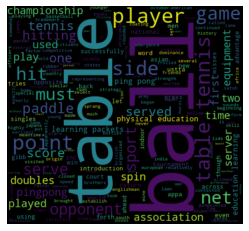

In [107]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [95]:
wordcloud2=WordCloud(width=520,height=480,max_words=6).generate(clean_data6)

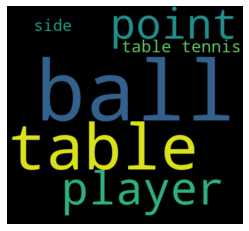

In [96]:
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [97]:
wordcloud1=WordCloud(width=720,height=680,colormap='Oranges_r').generate(clean_data6)

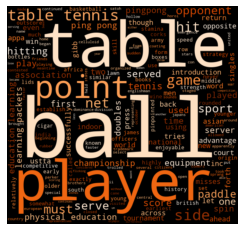

In [98]:
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [99]:
#sentiment analysis

In [100]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [101]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [102]:
analyser=SentimentIntensityAnalyzer()

In [103]:
scores=analyser.polarity_scores(clean_data6)

In [104]:
for key in sorted(scores):
           print('{0};{1}, '.format(key,scores[key],end=''))

compound;0.9911, 
neg;0.041, 
neu;0.825, 
pos;0.134, 
